In [7]:
import pandas as pd
import csv
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
covid = pd.read_csv('test_covid.csv')
covid

,#,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_1M_pop,Deaths_1M_pop,Total_Tests,Tests_1M_pop,Population
0,1,USA,98166904,1084282,94962112,2120510,2970,293206,3239,1118158870,3339729,3.348053e+08
1,2,India,44587307,528629,44019095,39583,698,31698,376,894416853,635857,1.406632e+09
2,3,France,35342950,155078,34527115,660757,869,538892,2365,271490188,4139547,6.558452e+07
3,4,Brazil,34706757,686027,33838636,182094,8318,161162,3186,63776166,296146,2.153536e+08
4,5,Germany,33312373,149948,32315200,847225,1406,397126,1788,122332384,1458359,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
193,202,Antigua_and_Barbuda,9098,146,8923,29,1,91429,1467,18901,189943,9.950900e+04
194,203,Guinea-Bissau,8796,175,8301,320,6,4263,85,145231,70385,2.063367e+06
195,205,Liberia,7961,294,7636,31,2,1501,55,139824,26356,5.305117e+06
196,206,Sierra_Leone,7751,126,0,0,933,15,259958,31296,8306436,NaN


In [9]:
#Datos covid
df_x = pd.DataFrame(covid.iloc[:,5:7])
df_x

,Active_Cases,Serious_Critical
0,2120510,2970
1,39583,698
2,660757,869
3,182094,8318
4,847225,1406
...,...,...
193,29,1
194,320,6
195,31,2
196,0,933


In [10]:
#Total Cases
df_y = covid.iloc[:,2]
df_y


0      98166904
1      44587307
2      35342950
3      34706757
4      33312373
         ...   
193        9098
194        8796
195        7961
196        7751
197        7583
Name: Total_Cases, Length: 198, dtype: int64

In [11]:
x_main,x_test,y_main,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=0) 

In [12]:
x_train,x_val,y_train,y_val = train_test_split(x_main,y_main,test_size=0.2,random_state=0)

In [15]:
x_val

,Active_Cases,Serious_Critical
141,1034,1376
2,660757,869
53,1338,24
31,57109,99
108,3872,3
127,227,356034
164,153,5
81,6396,17
171,3405,596131
153,0,140582


In [16]:
x_train

,Active_Cases,Serious_Critical
112,0,2
82,74198,4
191,729,1
19,803743,268661
169,5034,1
...,...,...
187,22,37069
1,39583,698
41,43994,33
28,8004,101


In [24]:
y_train

112      205637
82       601869
191        9931
19      6417941
169       21544
         ...   
187       11930
1      44587307
41      2359530
28      4661096
197        7583
Name: Total_Cases, Length: 126, dtype: int64

In [ ]:
y_test

In [17]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   
  
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 250, random_state = 0) 


RFReg.fit(x_val, y_val)

RandomForestRegressor(n_estimators=250, random_state=0)

In [18]:
#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((x_val))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_val, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)

R-Square Error associated with Random Forest Regression is: 0.8853902245575875


In [19]:
#RMSE
RMSE = mean_squared_error(y_val, y_predict_rfr, squared=False)   
print("My Root mean squared error is: ", RMSE)

My Root mean squared error is:  2180112.602609012


In [20]:
#MSE
MSE = mean_squared_error(y_val, y_predict_rfr)  
print("My Mean squared error is: ", MSE)

My Mean squared error is:  4752890960054.639


In [21]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_val, y_predict_rfr)*100

254.9564867310635

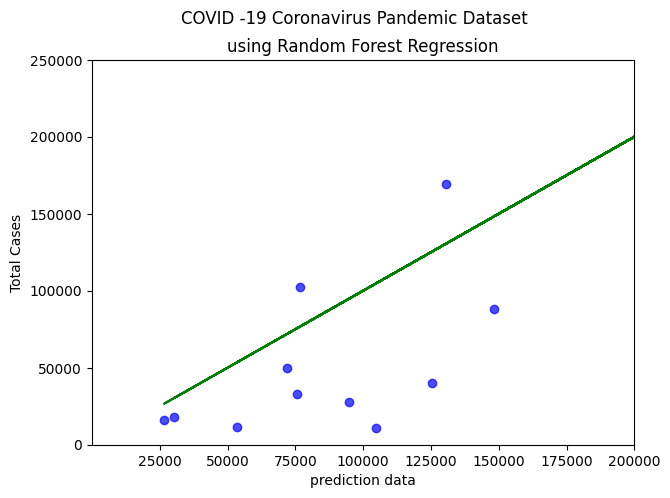

<Figure size 100x100 with 0 Axes>

In [22]:
fig,ax = plt.subplots(figsize=(7,5))
  
#Plot the predicted data
plt.plot(y_predict_rfr, y_predict_rfr, label= 'Linear Regression', color='g')
plt.scatter(y_predict_rfr, y_val, label='Actual Test Data', color='b', alpha=.7)

#Define the title 
plt.suptitle('COVID -19 Coronavirus Pandemic Dataset')  

plt.title('using Random Forest Regression')
  
#Define X axis label 
plt.xlabel('prediction data') 
  
#Define Y axis label 
plt.ylabel('Total Cases') 

#Set the size of the plot for better clarity
plt.figure(figsize=(1,1))

ax.set_xlim([5,0.2e6])
ax.set_ylim([0,0.25e6])
  
#Draw the plot 
plt.show() 